# Installation

In [11]:
%pip install -r requirements.txt

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/5j/g30ypjc12sv03pdwnk568clm0000gn/T/pip-req-build-15mmk59y
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/5j/g30ypjc12sv03pdwnk568clm0000gn/T/pip-req-build-15mmk59y
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 614d4c2029a62d348ca56598f87c425966aaec66
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 5.0/10.2 MB 73.8 kB/s eta 0:01:11m
ERROR: Exception:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", li

In [3]:
!pip install transformers

  Using cached transformers-4.50.0-py3-none-any.whl.metadata (39 kB)
  Using cached huggingface_hub-0.29.3-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 1.2 MB/s eta 0:00:0000:010:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.5 MB/s eta 0:00:00a 0:00:01


In [6]:
!pip install torch

# Importing

In [12]:
!pip install --upgrade --force-reinstall --no-deps kaggle

In [13]:
!kaggle competitions download -c works

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/kaggle/__init__.py", line 3, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/kaggle/api/kaggle_api_extended.py", line 32, in <module>
    import bleach
ModuleNotFoundError: No module named 'bleach'


In [8]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993331 sha256=edea91dba2a37f95ef32809e03c7ea934ac1f1c57fa7a6aec29b40cabda444d7
  Stored in directory: /Users/aubreysanjose/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


## From Kaggle

## To the Code

In [23]:
import pandas as pd
from transformers import RobertaTokenizer, RobertaModel
import torch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from langdetect import detect, LangDetectException
import re

## English Detection

In [31]:
def is_english(text):
    """Checks if a given text is in English."""
    try:
        return detect(str(text)) == 'en'
    except LangDetectException:
        return False

def remove_non_english_symbols(text):
    """Removes non-English symbols from a given text."""
    if isinstance(text, str):
        return re.sub(r'[^\x00-\x7F]+', '', text)  # or re.sub(r'[^\w\s.,!?]+', '', text)
    else:
        return text

def filter_english_dataframe(df, text_column, remove_symbols=True):
    """Filters a DataFrame for English text and optionally removes non-English symbols."""
    if remove_symbols:
        df[text_column] = df[text_column].apply(remove_non_english_symbols)
    english_mask = df[text_column].apply(is_english)
    return df[english_mask]

def filter_english_csv(filepath, text_column, output_filepath, remove_symbols=True):
    """
    Reads a CSV file, filters for English text, optionally removes non-English symbols,
    and saves the filtered DataFrame to a new CSV file.

    Args:
        filepath (str): The path to the input CSV file.
        text_column (str): The name of the column containing the text.
        output_filepath (str): The path to save the filtered CSV file.
        remove_symbols (bool): Whether to remove non-English symbols. Defaults to True.
    """
    try:
        df = pd.read_csv(filepath)
        sample_df = df.sample(n=1000)
        filtered_df = filter_english_dataframe(sample_df, text_column, remove_symbols)
        filtered_df.to_csv(output_filepath, index=False)
        print(f"Filtered data saved to {output_filepath}")
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [32]:
try:
    input_csv_path = "hashtag_joebiden.csv"  # Replace with the path to your input CSV file.
    output_csv_path = "english_hashtagjoebiden.csv" # Replace with the desired output CSV file path.
    text_column_name = "tweet" # Replace 'your_text_column' with the actual column name.

    filter_english_csv(input_csv_path, text_column_name, output_csv_path)
except FileNotFoundError:
    print("Error: csv file not found.")
    exit()

/var/folders/5j/g30ypjc12sv03pdwnk568clm0000gn/T/ipykernel_7861/95167050.py:34: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Filtered data saved to english_hashtagjoebiden.csv


# Preprocessing

In [33]:
# 1. Load Data
try:
    df = pd.read_csv("english_hashtagjoebiden.csv")
    text_data = df["tweet"].tolist()
    print(df.head())
except FileNotFoundError:
    print("Error: election_tweets.csv not found. Please provide your data.")
    exit()

            created_at      tweet_id  \
0  2020-10-21 22:16:54  1.319040e+18   
1  2020-10-15 17:29:49  1.316793e+18   
2  2020-10-16 06:50:07  1.316995e+18   
3  2020-10-21 18:12:04  1.318978e+18   
4  2020-11-04 20:43:53  1.324090e+18   

                                               tweet  likes  retweet_count  \
0  @HELLuvvANGEL @ACLU Why cant they be thrown ou...    0.0            0.0   
1  CDC demoralized after Trump White House forces...    0.0            0.0   
2  Biden urges state, local leaders to mandate CO...    2.0            1.0   
3  @JoeBiden Therere those who are running with t...    0.0            0.0   
4  Simple is that look at on both, who's roaring ...    0.0            0.0   

                source       user_id            user_name user_screen_name  \
0   Twitter for iPhone  1.025741e+09   Darlene Cullington     dacullington   
1      Twitter Web App  2.395433e+07         Hotpage News     Hotpage_News   
2  Twitter for Android  8.529172e+17        Shan Samacha

In [34]:
# 2. Text Cleaning
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join(char for char in text if char.isalnum() or char.isspace())
        return text.strip()
    else:
        return ""

cleaned_texts = [clean_text(text) for text in text_data]

# Tokenization and Embeddings

In [ ]:
# 3. RoBERTa Embeddings
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

def get_roberta_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
    return embeddings

embeddings = get_roberta_embeddings(cleaned_texts)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
# get roberta embeddings
print(embeddings)

[[ 0.0474395  -0.12702553  0.031167   ... -0.13013093 -0.01736854
   0.0710021 ]
 [-0.00094322  0.00113587  0.03525187 ... -0.19989279 -0.0068086
  -0.00476605]
 [ 0.03963874 -0.01749429  0.08278573 ... -0.09772956  0.01257216
   0.0782351 ]
 ...
 [ 0.00564917 -0.05272923  0.10154498 ... -0.10576609 -0.06351122
   0.11895609]
 [ 0.01366617 -0.13140659  0.11325218 ... -0.06512066 -0.02034074
   0.01025055]
 [-0.07239185 -0.07052562  0.09519149 ... -0.08967546 -0.00120606
   0.06951902]]


In [36]:
# 4. Data Scaling (important for k-means)
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(embeddings)

# 5. K-means Clustering
n_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_embeddings)
labels = kmeans.labels_

# 6. Add Cluster Labels to DataFrame
df["cluster"] = labels

In [38]:
# 7. Basic Analysis (example)
for cluster_id in range(n_clusters):
    cluster_tweets = df[df["cluster"] == cluster_id]["tweet"].tolist()
    print(f"Cluster {cluster_id}:")
    for tweet in cluster_tweets[:5]: #print 5 tweets per cluster
        print(f"  - {tweet}")
    print("-" * 20)

# 8. save results to a csv.
df.to_csv("clustered_election_bidentweets.csv", index=False)

print("Clustering complete. Results saved to clustered_election_bidentweets.csv")

Cluster 0:
  - #USelections2020
#trump
#biden https://t.co/FrGHzxAccT
  - #Elections2020  #amerikakiest #wnl #trump #biden https://t.co/a9pwpa5Eof
  - #debate #Debates2020 #PresidentialDebate2020 #BidenHarris2020 #TrumpIsPathetic #DebateTonight #Election2020 #debates #VoteBidenHarris2020 #TrumpMeltdown #Trump #Biden #COVID19  https://t.co/jKrQSsvVwL
  - #USElection2020 
#USElection 
#PresidentialElection2020 
#Biden 
#Trump https://t.co/M2v8BvnmHL
  - "Trump keeps talking about losing":
https://t.co/UbcHDZC2Zg #Biden #politics
--------------------
Cluster 1:
  - @HELLuvvANGEL @ACLU Why cant they be thrown out if they r found to be outside the law?  Fast forward 4 months, and Im listening to @Obama talking about Trumps crazy tweeting and conspiracy theories!  My gawd, how low weve sunken w/ arsehole DT!  Miss Obama so much! #Biden #YangForDeptOfEducation
  - @JoeBiden Therere those who are running with the misinformation that under #Bidens tax plan those making over 400k will pay 62% of

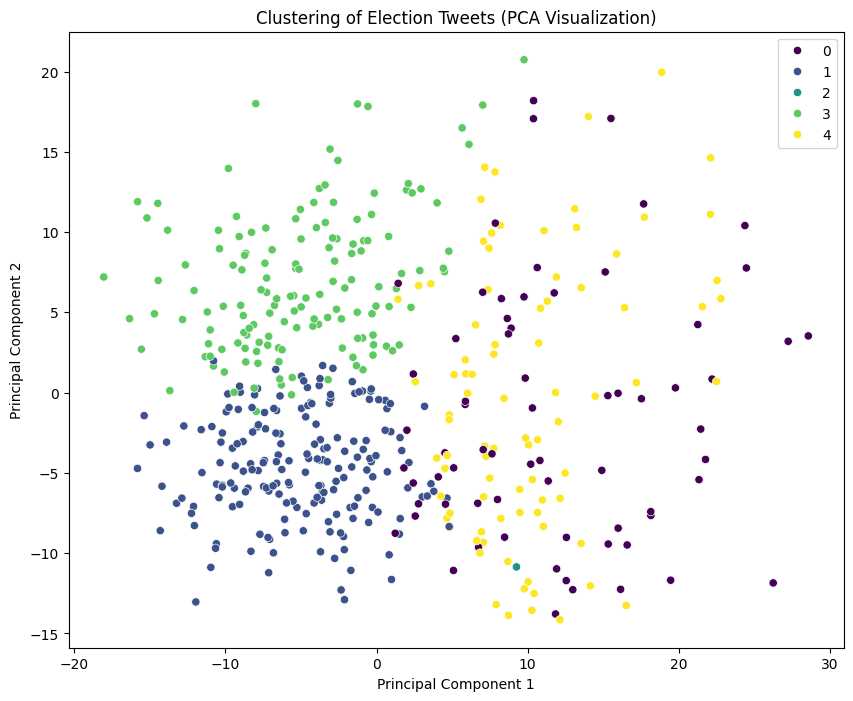

Clustering complete. Results saved to clustered_election_tweets.csv


In [39]:
# Visualization (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(scaled_embeddings)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=labels, palette="viridis")
plt.title("Clustering of Election Tweets (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# save results to a csv.
df.to_csv("clustered_election_tweets.csv", index=False)

print("Clustering complete. Results saved to clustered_election_tweets.csv")